## IMPORT LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [116]:
data = pd.read_csv(r"jobs_in_data.csv") # relative path of csv file

In [117]:
data

work_year                                 job_title  \
0          2023                      Data DevOps Engineer   
1          2023                            Data Architect   
2          2023                            Data Architect   
3          2023                            Data Scientist   
4          2023                            Data Scientist   
5          2023                            Data Scientist   
6          2023                            Data Scientist   
7          2023               Machine Learning Researcher   
8          2023               Machine Learning Researcher   
9          2023                             Data Engineer   
10         2023                             Data Engineer   
11         2023                 Machine Learning Engineer   
12         2023                 Machine Learning Engineer   
13         2023                            Data Scientist   
14         2023                            Data Scientist   
15         2023                              Data Analyst   
16         2023                              Data Analyst   
17         2023                            Data Scientist   
18         2023                            Data Scientist   
19         2023                        Analytics Engineer   
20         2023                        Analytics Engineer   
21         2023                 Machine Learning Engineer   
22         2023                 Machine Learning Engineer   
23         2023                              Data Analyst   
24         2023                              Data Analyst   
25         2023                 Machine Learning Engineer   
26         2023                 Machine Learning Engineer   
27         2023                         Applied Scientist   
28         2023                         Applied Scientist   
29         2023                 Machine Learning Engineer   
30         2023                 Machine Learning Engineer   
31         2023                              BI Developer   
32         2023                              BI Developer   
33         2023                             Data Engineer   
34         2023                             Data Engineer   
35         2023            Business Intelligence Engineer   
36         2023            Business Intelligence Engineer   
37         2023                             Data Engineer   
38         2023                             Data Engineer   
39         2023                             Data Engineer   
40         2023                             Data Engineer   
41         2023                              Data Analyst   
42         2023                              Data Analyst   
43         2023                 Machine Learning Engineer   
44         2023                 Machine Learning Engineer   
45         2023                        Research Scientist   
46         2023                        Research Scientist   
47         2023                            Data Scientist   
48         2023                            Data Scientist   
49         2023                             Data Engineer   
50         2023                             Data Engineer   
51         2023                            Data Scientist   
52         2023                            Data Scientist   
53         2023                          Research Analyst   
54         2023                          Research Analyst   
55         2023                        Analytics Engineer   
56         2023                        Analytics Engineer   
57         2023                        Research Scientist   
58         2023                        Research Scientist   
59         2023                             Data Engineer   
60         2023                             Data Engineer   
61         2023                         Research Engineer   
62         2023                         Research Engineer   
63         2023                              Data Analyst   
64         2023                          

In [118]:
# make a copy of the original data
df = data.copy()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [120]:
df.shape

(9355, 12)

In [121]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)

## Data visualisation

#### salary vs job_category

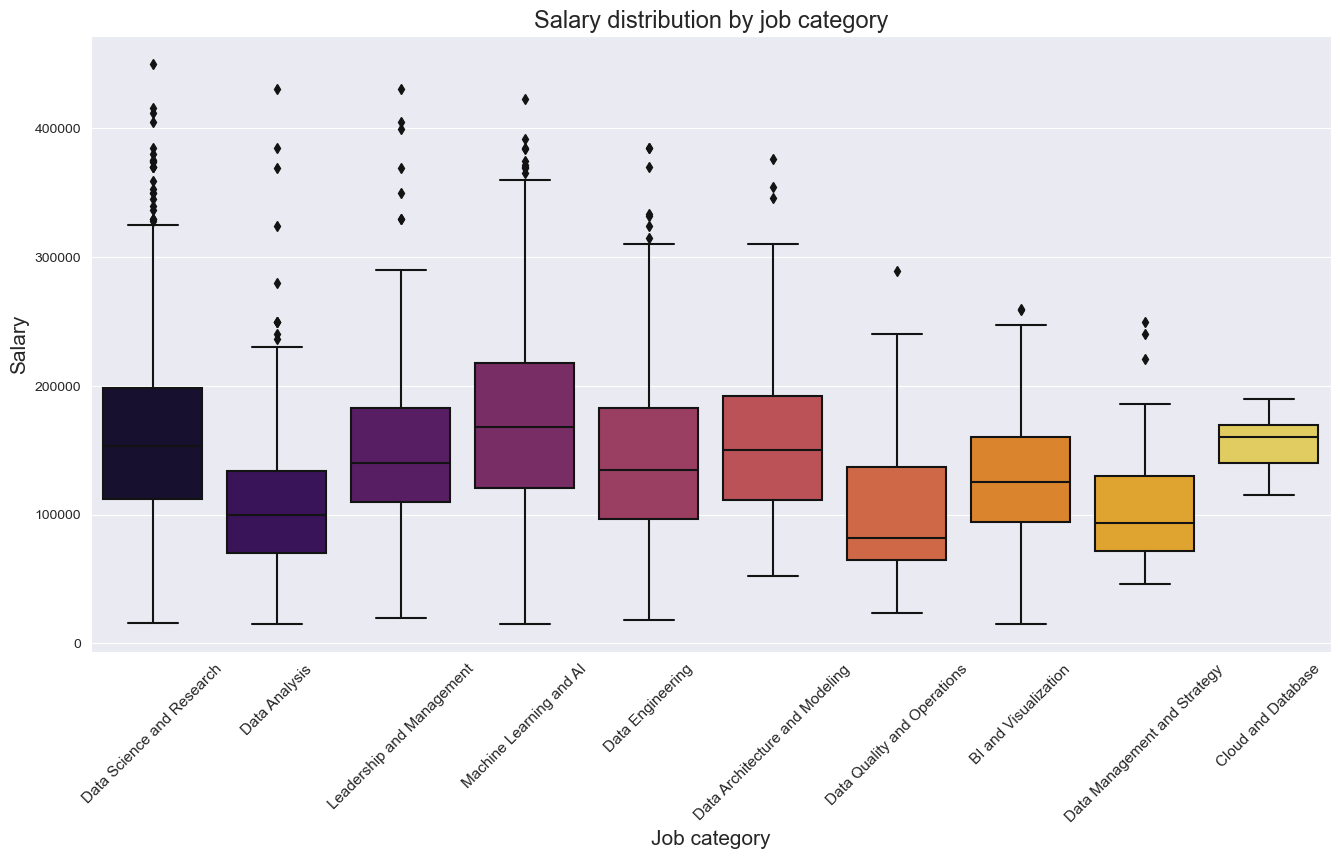

In [54]:
top_paid = df.sort_values(by = 'salary_in_usd', ascending = False)

sns.set_style('darkgrid')
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'job_category', y = 'salary_in_usd', data = top_paid, palette = 'inferno')
plt.title('Salary distribution by job category', fontsize = 17)
plt.xlabel('Job category', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.xticks(rotation = 45, ha = 'center', fontsize = 11)
plt.show()

**Insights**:
- Machine learning and AI has the highest salary package 
- whereas Data science and research has multiple outliers which contributes to its highest salary package 

#### top job category by highest average salary

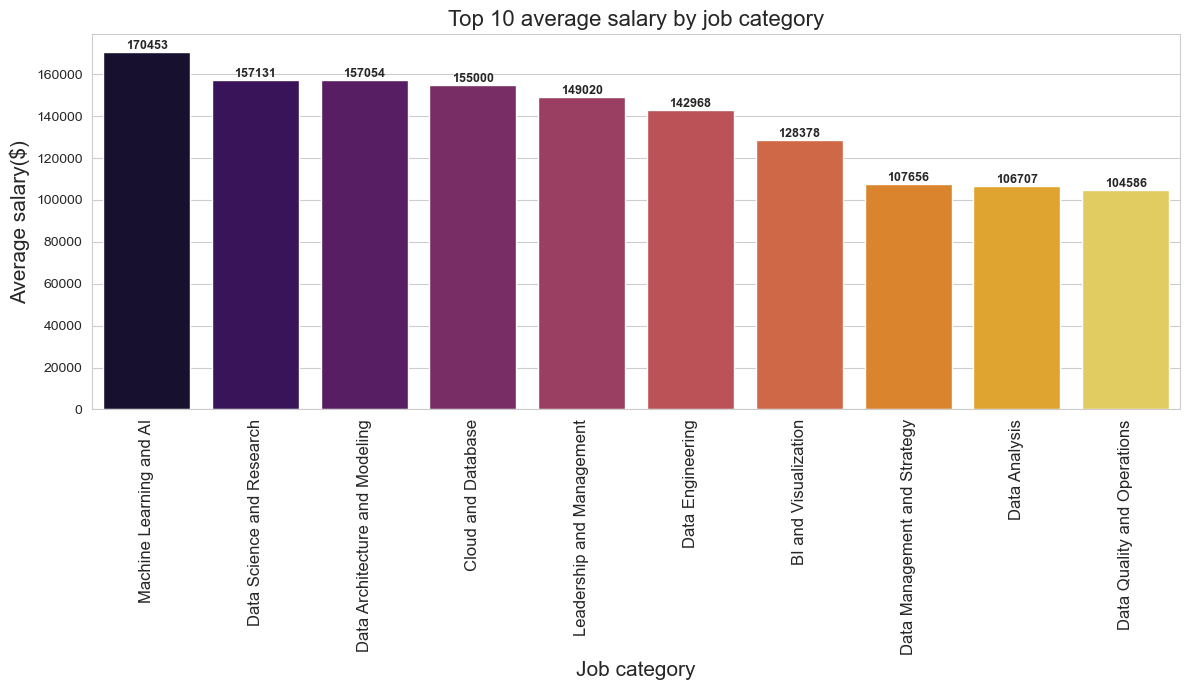

In [45]:
top_job_category = df.groupby('job_category', as_index = False)['salary_in_usd'].mean().round(1).sort_values(by = 'salary_in_usd', ascending = False).head(10)
plt.figure(figsize = (12, 7))
ax = sns.barplot(data = top_job_category, x = 'job_category', y = 'salary_in_usd', palette = 'inferno')
ax.bar_label(ax.containers[0], label_type = 'edge', fontweight = 'bold', fontsize = 9)
plt.title('Top 10 average salary by job category', fontsize = 16)
plt.xlabel('Job category', fontsize = 15)
plt.ylabel('Average salary($)', fontsize = 15)
plt.xticks(rotation = 90, ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()


**Insights**:
- Machine learning and AI has the highest salary package on an average basis
- Data quality and operations has the lowest average salary in contrast

Q. What is the average salary of professionals working in data science related field globally?

In [88]:
avg_salary = df['salary_in_usd'].mean().round(1)
print(f"The average salary is ${avg_salary}")

The average salary is $146258.4


Q. How many employees earn more than the average of $146258?

In [106]:
a_a = df[df['salary_in_usd'] > avg_salary]['salary_in_usd'].count()
print(f"{a_a} employees earn more than the average.")

2437 employees earn more than the average.


Q. How many employees earn less than the average of $146258?

In [113]:
b_a = df[df['salary_in_usd'] < avg_salary]['salary_in_usd'].count()
print(f"{b_a} employees earn less than the average.")

2904 employees earn less than the average.


#### Salary by job_title

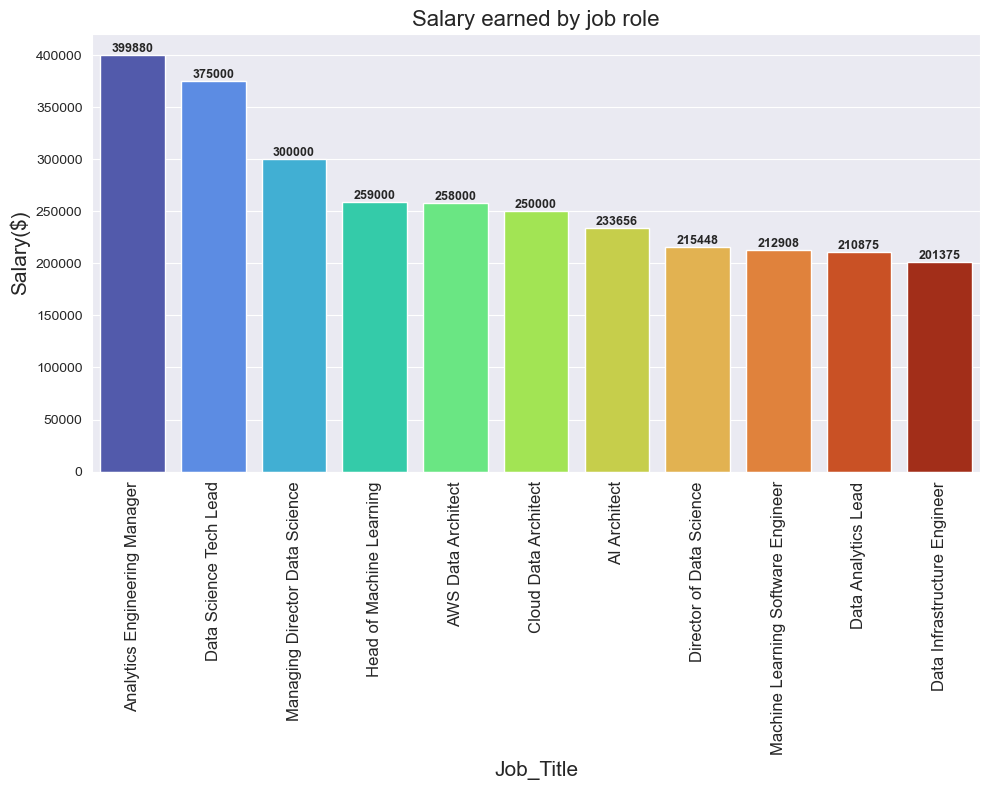

In [57]:
highest_earners = df.groupby('job_title', as_index = False)['salary_in_usd'].mean().round(1).sort_values(by = 'salary_in_usd', ascending = False)[:11]
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'job_title', y = 'salary_in_usd', data = highest_earners, palette = 'turbo')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)

plt.title('Salary earned by job role', fontsize = 16)
plt.xlabel('Job_Title', fontsize = 15)
plt.ylabel('Salary($)', fontsize = 15)
plt.xticks(rotation = 90, ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

#### Salary differences by geographic location

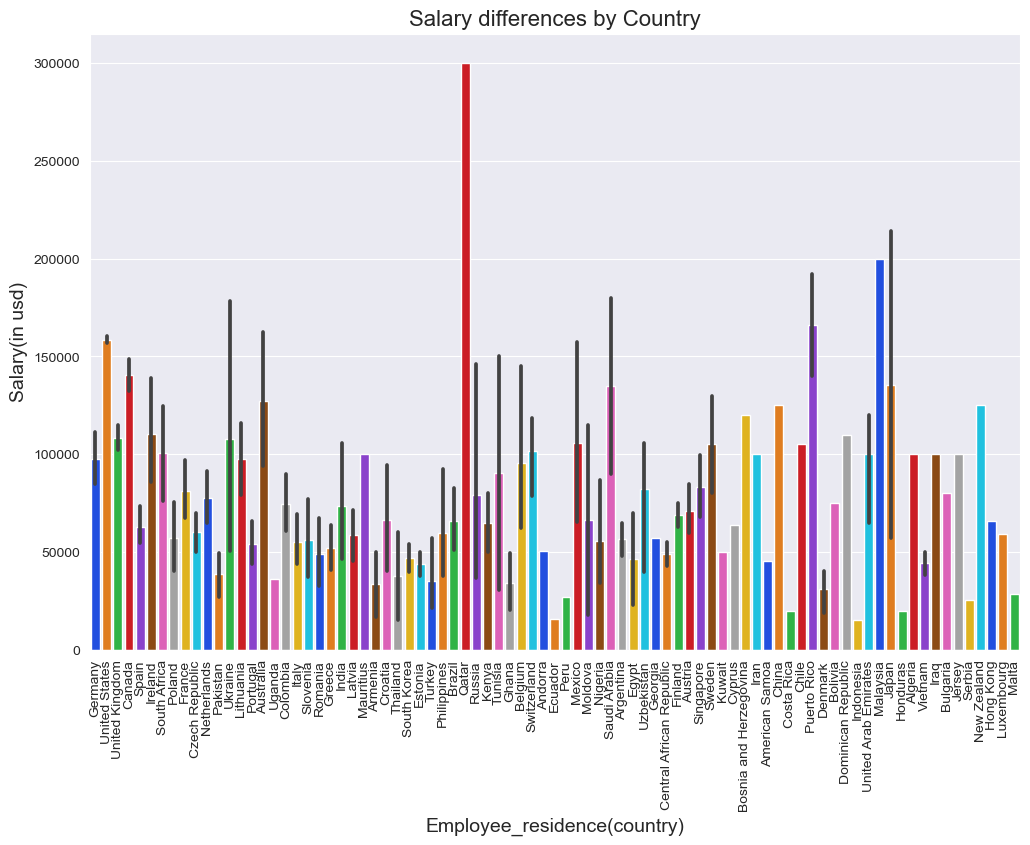

In [115]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'employee_residence', y = 'salary_in_usd', data = df, palette = 'bright')
plt.title('Salary differences by Country', fontsize= 16)
plt.xlabel('Employee_residence(country)', fontsize = 14)
plt.ylabel('Salary(in usd)', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

#### Top 10 countries with highest average salaries

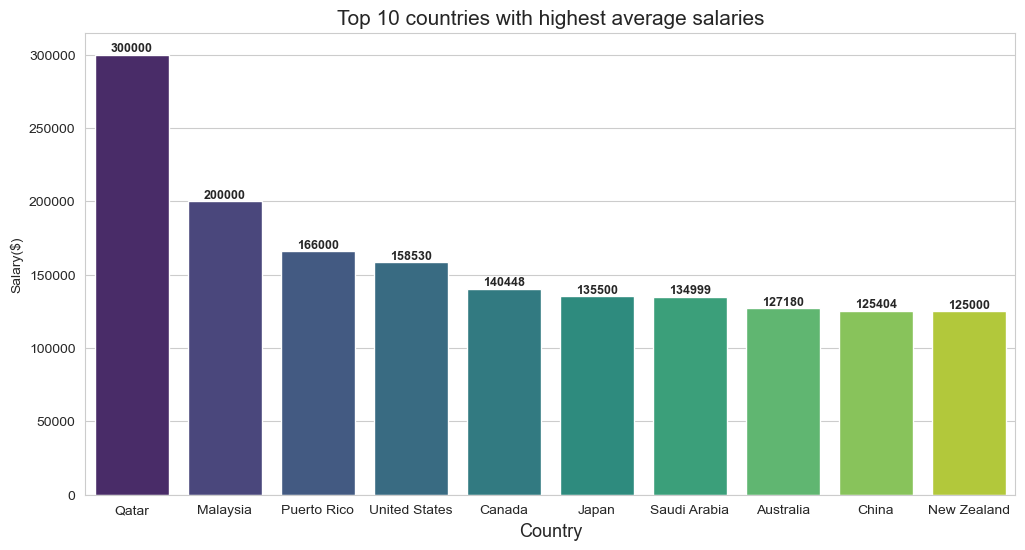

In [49]:
avg_salary_location = df.groupby('employee_residence', as_index = False)['salary_in_usd'].mean().round(1).sort_values(by='salary_in_usd', ascending = False).head(10)
plt.figure(figsize = (12, 6))
ax = sns.barplot(data = avg_salary_location, y = 'salary_in_usd', x = 'employee_residence', palette = 'viridis')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)
plt.title('Top 10 countries with highest average salaries', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Salary($)')
plt.show()

**Insights**:
- Qatar has the highest average salary on average, i.e being the oil rich country it is, contributes to this.
- Malaysia is a modern country which focuses on technological development and hence invests in the IT sector.
- USA and Canada are in 4th and 5th position respectively.

#### Top 5 countries with highest employee residence

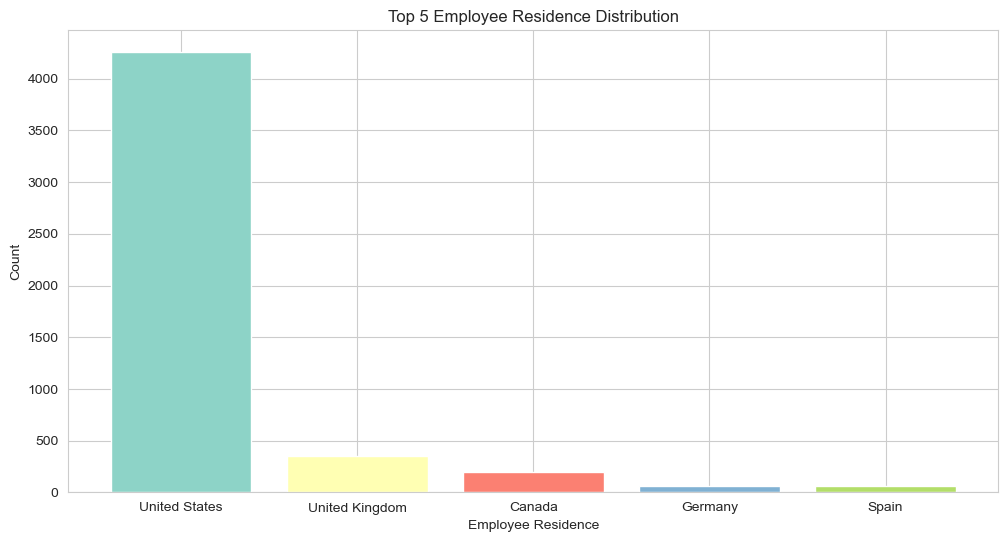

In [31]:
employee_residence_counts = df['employee_residence'].value_counts().head(5)
colors = plt.cm.Set3(np.linspace(0, 0.5, 5)) 
plt.figure(figsize=(12, 6))
plt.bar(employee_residence_counts.index, employee_residence_counts, color=colors)
plt.title('Top 5 Employee Residence Distribution')
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.show()

**Insights**:
- USA ,by a significant margin, has data science professionnals residing in it. It is primarily due to various companies of different sectors that exist in USA and require data science professionals for their analysis work.

In [103]:
USA_em = df[df['employee_residence'] == 'United States']['employee_residence'].count()
USA_em

4255

#### Salary distribution by experience

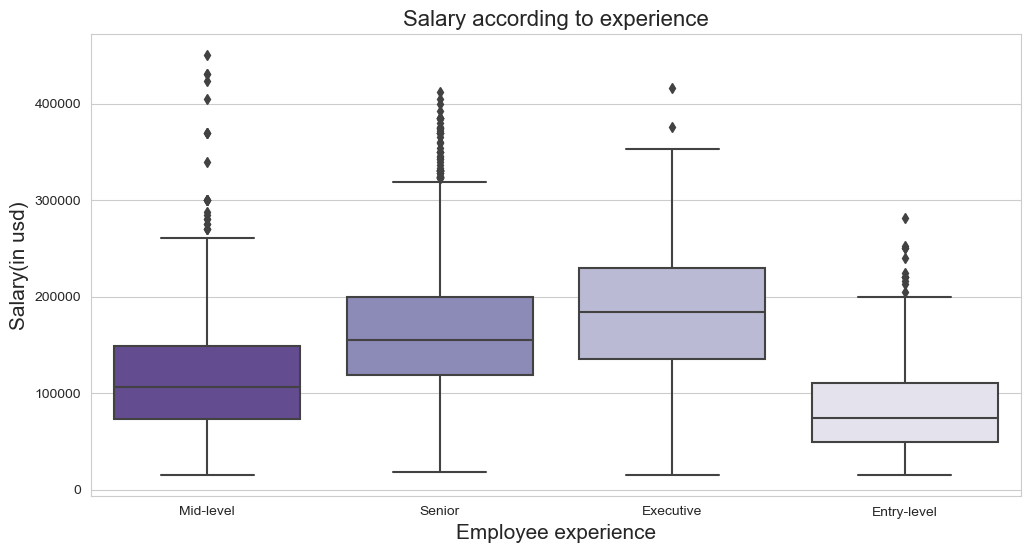

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = df, palette = 'Purples_r')
plt.title('Salary according to experience', fontsize = 16)
plt.xlabel('Employee experience', fontsize = 15)
plt.ylabel('Salary(in usd)', fontsize = 15)
plt.show()

**Insights**:
- Employees of mid-level experience have the highest workload and flexible responsibilities within the company, hence their salary is could be more than the expected range and tend to have more outliers.
- Executive level employees have the highest salary package by default due to their position within the company followed by senior level employees

#### Jobs by experience level

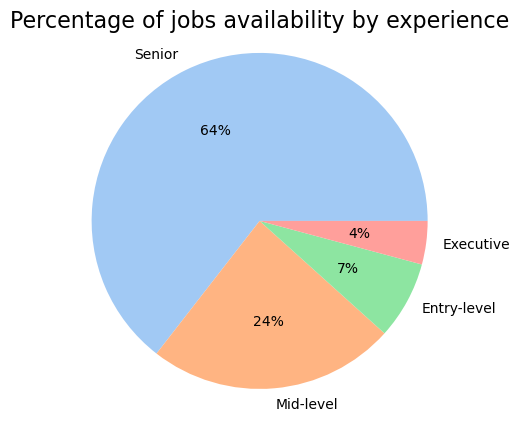

In [15]:
experience_count = df['experience_level'].value_counts()
plt.pie(experience_count, labels = experience_count.index, autopct = "%0.0f%%", startangle = 0, 
        colors = sns.color_palette('pastel'))
plt.title('Percentage of jobs availability by experience', fontsize = 16)
plt.axis('equal')
plt.show()

**insights**:
- Out of all the jobs available, most of them are for the senior level employees with a lot of experience followed by ,mid level emp
- Entry-level and executive level jobs offers are much more scarce due to their positions in the hierarchy of a organisations employee tree

#### Salary by work setting

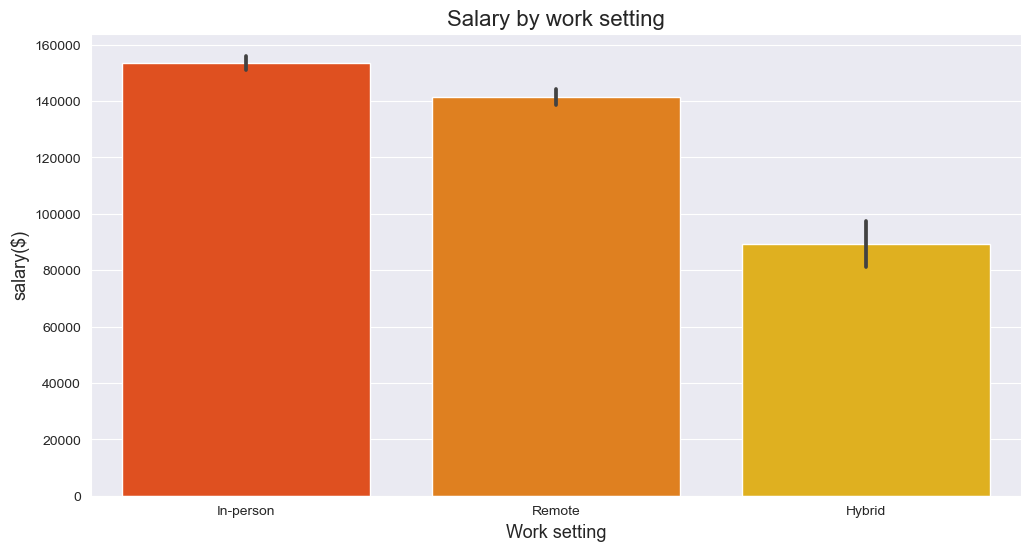

In [60]:
work_setting_salary = df.sort_values(by = 'salary_in_usd', ascending = True)
sns.set_style('darkgrid')
plt.figure(figsize = (12, 6))
sns.barplot(x = 'work_setting', y = 'salary_in_usd', data = work_setting_salary, palette = 'autumn')
plt.title('Salary by work setting', fontsize = 16)
plt.xlabel('Work setting', fontsize = 13)
plt.ylabel('salary($)', fontsize = 13)
plt.show()

**Insights**:
- for employees who work in office generally have the higher salary when compared to remote type and hybrid type of work setting

**SUMMARY**:
we have used pandas, seaborn and matplotlib.pyplot to perform EDA of data science jobs, few significant points are-
- Most of the emloyees are residing in USA
- Job opportunities are more for mid and senior level employees in compared to entry level and executive level.
- Employees who work in office have higher salary.